In [5]:
import matplotlib.pyplot as plt
import numpy as np


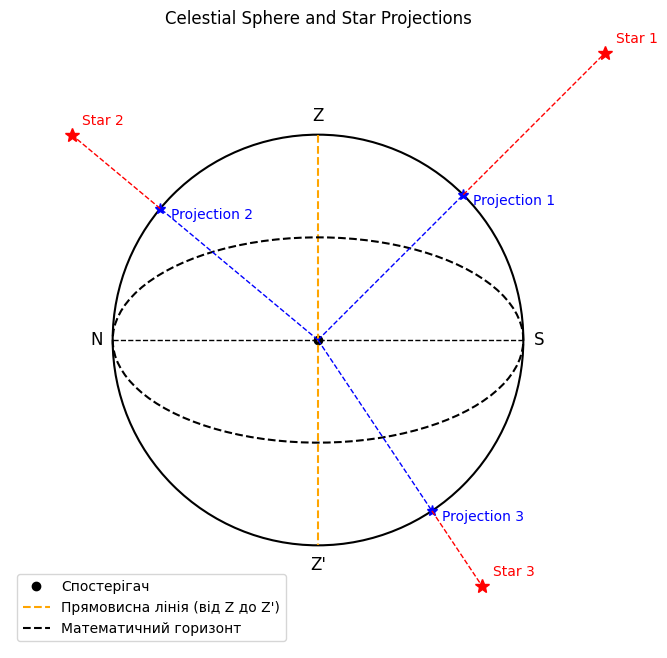

In [6]:
# Define the figure and axes
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, aspect='equal')

# Draw the celestial sphere (circle)
circle = plt.Circle((0, 0), 1, edgecolor="black", facecolor="none", linewidth=1.5)
ax.add_artist(circle)

# Add the observer at the center
ax.plot(0, 0, 'o', color="black", label="Спостерігач")

# Draw the celestial equator (horizontal line)
ax.plot([-1, 1], [0, 0], linestyle="--", color="black", linewidth=1)

# Add the poles (Z and Z')
ax.text(0, 1.05, "Z", ha='center', va='bottom', fontsize=12)
ax.text(0, -1.05, "Z'", ha='center', va='top', fontsize=12)

# Draw the line connecting Z and Z' in a distinct color (e.g., green)
ax.plot([0, 0], [1, -1], linestyle="--", color="orange", linewidth=1.5, label="Прямовисна лінія (від Z до Z')")

# Add cardinal points (N and S)
ax.text(-1.05, 0, "N", ha='right', va='center', fontsize=12)
ax.text(1.05, 0, "S", ha='left', va='center', fontsize=12)

# Draw horizon plane (elliptical projection)
theta = np.linspace(0, 2 * np.pi, 100)
horizon_x = np.cos(theta)
horizon_y = 0.5 * np.sin(theta)
ax.plot(horizon_x, horizon_y, color="black", linestyle="--", label="Математичний горизонт")

# Define stars outside the celestial sphere
outer_star_positions = [(1.4, 1.4), (-1.2, 1.0), (0.8, -1.2)]  # Adjusted Star 3 position

# Draw the stars outside the celestial sphere
for x, y in outer_star_positions:
    ax.plot(x, y, '*', color="red", markersize=10)

# Project the stars onto the celestial sphere and draw the projections
projected_star_positions = []
for x, y in outer_star_positions:
    factor = 1 / np.sqrt(x**2 + y**2)  # Normalize to the celestial sphere radius
    proj_x, proj_y = x * factor, y * factor
    projected_star_positions.append((proj_x, proj_y))
    ax.plot(proj_x, proj_y, '*', color="blue", markersize=8)

# Draw lines connecting the observer, projections, and stars
for (x_outer, y_outer), (x_proj, y_proj) in zip(outer_star_positions, projected_star_positions):
    # Line from observer to projection
    ax.plot([0, x_proj], [0, y_proj], color="blue", linestyle="--", linewidth=1)
    # Line from projection to outer star
    ax.plot([x_proj, x_outer], [y_proj, y_outer], color="red", linestyle="--", linewidth=1)

# Annotate the stars and projections
for i, ((x_outer, y_outer), (x_proj, y_proj)) in enumerate(zip(outer_star_positions, projected_star_positions)):
    ax.text(x_outer + 0.05, y_outer + 0.05, f"Star {i+1}", color="red", fontsize=10)
    ax.text(x_proj + 0.05, y_proj - 0.05, f"Projection {i+1}", color="blue", fontsize=10)

# Set axis limits and remove axes for aesthetic purposes
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.axis("off")

# Add legend and show the plot
plt.legend(loc="lower left")
plt.title("Celestial Sphere and Star Projections")

plt.savefig("celestial_sphere_1.png", format="png", dpi=300, bbox_inches="tight")

plt.show()
